In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import json
import json_flatten
import fotmob_scraper as fms
from tqdm import tqdm

In [2]:
match_id = 3624062
league_id = 69
match_url = "https://www.fotmob.com/matchDetails?matchId={}"
league_url = "https://www.fotmob.com/leagues?id={}"

api_delay=1.0


In [3]:
df_test = fms.get_league_team_stats(league_id)

  0%|          | 0/110 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
df_test.to_csv('super_leagues_team_stats_2122.csv')

In [ ]:
df_test.loc[:,['expected_goals_(xg)_mean','expected_goals_against_(xga)_mean','expected_goals_(xg)_sum','expected_goals_against_(xga)_sum']].sort_values(by='expected_goals_(xg)_mean', ascending=False)

,expected_goals_(xg)_mean,expected_goals_against_(xga)_mean,expected_goals_(xg)_sum,expected_goals_against_(xga)_sum
0,2.190000,1.643636,48.18,36.16
9,2.173636,0.997273,47.82,21.94
1,1.891364,1.433182,41.61,31.53
6,1.759091,1.453636,38.70,31.98
8,1.663636,1.791818,36.60,39.42
2,1.616818,1.545909,35.57,34.01
4,1.402727,1.456364,30.86,32.04
7,1.263182,1.980000,27.79,43.56
5,1.131818,1.773182,24.90,39.01
3,1.006364,2.023636,22.14,44.52


In [ ]:
df_test

,team,ball_possession_mean,expected_goals_(xg)_mean,total_shots_mean,big_chances_mean,big_chances_missed_mean,accurate_passes_mean,fouls_committed_mean,offsides_mean,corners_mean,...,expected_goals_against_(xga)_sum,xga_first_half_sum,xga_second_half_sum,xga_open_play_sum,xga_set_play_sum,xga_on_target_(xgaot)_sum,xg_penalty_sum,xga_penalty_sum,goals_against_over_expected_sum,goals_over_expected_sum
0,Basel,56.363636,2.190000,15.318182,3.090909,1.500000,390.636364,10.272727,1.954545,5.500000,...,36.16,15.20,20.95,24.59,6.13,28.76,0.79,0.79,-11.16,-0.18
1,FC Zürich,46.772727,1.891364,15.500000,2.454545,1.000000,295.772727,11.090909,1.681818,4.863636,...,31.53,16.06,15.51,23.04,5.83,33.11,0.00,0.00,-3.53,9.39
2,Grasshopper,50.409091,1.616818,12.772727,2.500000,1.409091,323.772727,14.454545,1.636364,4.954545,...,34.01,12.16,21.77,20.90,7.11,31.42,1.57,1.58,-1.01,1.43
3,Lausanne,44.636364,1.006364,10.454545,1.181818,0.772727,308.590909,12.636364,1.136364,3.454545,...,44.52,14.42,30.11,30.29,5.60,40.34,1.58,1.57,3.48,-3.14
4,Lugano,49.954545,1.402727,12.818182,1.909091,1.090909,342.409091,12.727273,2.136364,4.227273,...,32.04,15.02,16.99,19.14,6.85,30.03,0.00,0.00,-1.04,-3.86
5,Luzern,50.500000,1.131818,14.181818,1.090909,0.590909,337.363636,11.181818,1.772727,4.818182,...,39.01,17.51,21.44,28.41,6.84,43.38,0.00,0.00,2.99,-1.90
6,Servette,51.772727,1.759091,14.500000,2.454545,1.500000,372.227273,11.772727,1.272727,4.590909,...,31.98,14.09,17.90,21.02,5.44,32.79,0.79,0.79,8.02,-3.70
7,Sion,43.409091,1.263182,11.318182,1.454545,0.727273,269.090909,12.090909,1.590909,3.727273,...,43.56,19.25,24.30,32.57,7.11,35.00,0.79,0.79,-3.56,2.21
8,St. Gallen,49.909091,1.663636,14.318182,2.363636,1.272727,289.318182,10.681818,1.409091,6.045455,...,39.42,16.67,22.75,26.16,11.69,38.32,0.00,0.00,4.58,0.40
9,Young Boys,56.272727,2.173636,19.409091,2.590909,1.136364,361.863636,11.681818,2.045455,6.954545,...,21.94,9.96,12.02,13.80,4.99,22.50,0.79,0.79,6.06,4.18


In [ ]:
df_test.columns

Index(['team', 'ball_possession_mean', 'expected_goals_(xg)_mean',
       'total_shots_mean', 'big_chances_mean', 'big_chances_missed_mean',
       'accurate_passes_mean', 'fouls_committed_mean', 'offsides_mean',
       'corners_mean',
       ...
       'expected_goals_against_(xga)_sum', 'xga_first_half_sum',
       'xga_second_half_sum', 'xga_open_play_sum', 'xga_set_play_sum',
       'xga_on_target_(xgaot)_sum', 'xg_penalty_sum', 'xga_penalty_sum',
       'goals_against_over_expected_sum', 'goals_over_expected_sum'],
      dtype='object', length=113)

In [ ]:
df_test.loc[10] = df_test.mean()

<ipython-input-26-8effb87b6a3a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test.loc[10] = df_test.mean()


In [ ]:
df_test.loc[10,'team'] = 'Average'

In [ ]:
df_test.loc[df_test['team'] == 'Average','expected_goals_(xg)_mean']

10    1.609864
Name: expected_goals_(xg)_mean, dtype: float64

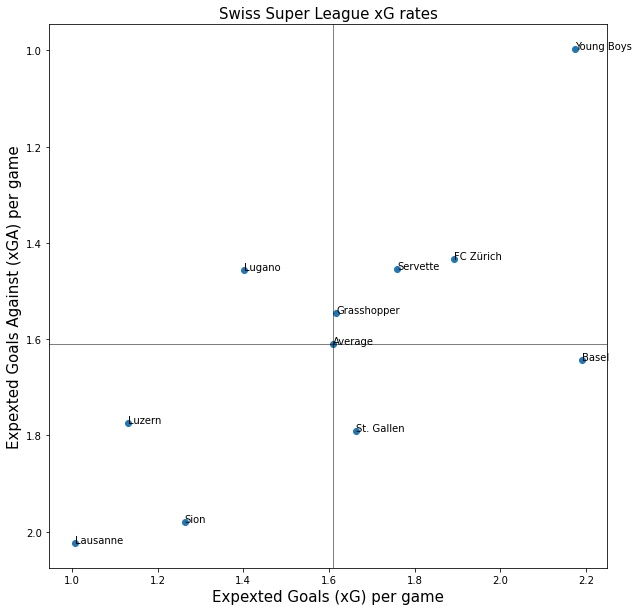

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=df_test['expected_goals_(xg)_mean'], y=df_test['expected_goals_against_(xga)_mean'])
ax.set_xlabel('Expexted Goals (xG) per game',fontsize=15)
ax.set_ylabel('Expexted Goals Against (xGA) per game',fontsize=15)
ax.set_title('Swiss Super League xG rates',fontsize=15)


ax.axvline(df_test.loc[df_test['team'] == 'Average','expected_goals_against_(xga)_mean'].values[0], color='black', linewidth=0.5)
ax.axhline(df_test.loc[df_test['team'] == 'Average','expected_goals_(xg)_mean'].values[0], color='black', linewidth=0.5)

#ax.set_xlim(0)
#ax.set_ylim(0,3.2)

ax.axes.invert_yaxis()

for a in df_test['team']:
    ax.annotate(a, (df_test.loc[df_test['team'] == a,'expected_goals_(xg)_mean'].values[0],df_test.loc[df_test['team'] == a,'expected_goals_against_(xga)_mean'].values[0]))

plt.show()

fig .savefig('super_league_xg_rates_22_02_22.jpg')


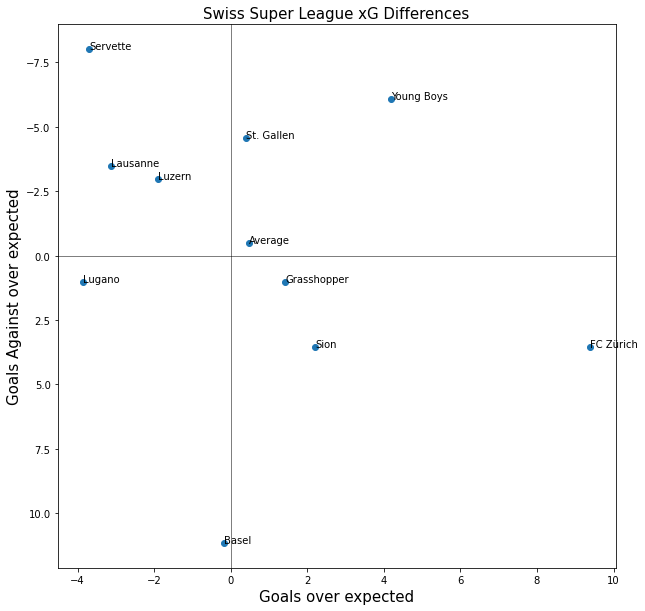

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=df_test['goals_over_expected_sum'], y=-df_test['goals_against_over_expected_sum'])
ax.set_xlabel('Goals over expected',fontsize=15)
ax.set_ylabel('Goals Against over expected',fontsize=15)
ax.set_title('Swiss Super League xG Differences',fontsize=15)


ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.axes.invert_yaxis()

for a in df_test['team']:
    ax.annotate(a, (df_test.loc[df_test['team'] == a,'goals_over_expected_sum'].values[0],-df_test.loc[df_test['team'] == a,'goals_against_over_expected_sum'].values[0]))

plt.show()


In [ ]:
df_test.columns

Index(['team', 'ball_possession_mean', 'expected_goals_(xg)_mean',
       'total_shots_mean', 'big_chances_mean', 'big_chances_missed_mean',
       'accurate_passes_mean', 'fouls_committed_mean', 'offsides_mean',
       'corners_mean',
       ...
       'expected_goals_against_(xga)_sum', 'xga_first_half_sum',
       'xga_second_half_sum', 'xga_open_play_sum', 'xga_set_play_sum',
       'xga_on_target_(xgaot)_sum', 'xg_penalty_sum', 'xga_penalty_sum',
       'goals_against_over_expected_sum', 'goals_over_expected_sum'],
      dtype='object', length=113)

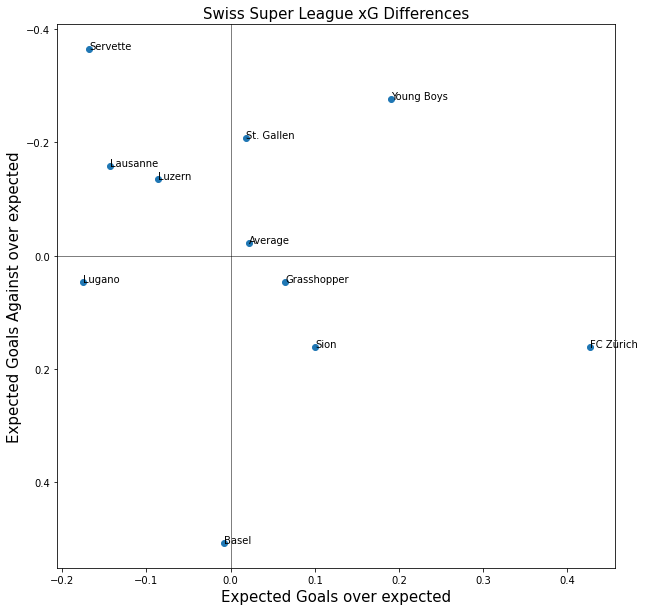

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=df_test['goals_over_expected_mean'], y=-df_test['goals_against_over_expected_mean'])
ax.set_xlabel('Expected Goals over expected',fontsize=15)
ax.set_ylabel('Expected Goals Against over expected',fontsize=15)
ax.set_title('Swiss Super League xG Differences',fontsize=15)

ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)

ax.axes.invert_yaxis()

for a in df_test['team']:
    ax.annotate(a, (df_test.loc[df_test['team'] == a,'goals_over_expected_mean'].values[0],-df_test.loc[df_test['team'] == a,'goals_against_over_expected_mean'].values[0]))

plt.show()

In [ ]:
df_test

,team,ball_possession_mean,expected_goals_(xg)_mean,total_shots_mean,big_chances_mean,big_chances_missed_mean,accurate_passes_mean,fouls_committed_mean,offsides_mean,corners_mean,...,Basel,FC Zürich,Grasshopper,Lausanne,Lugano,Luzern,Servette,Sion,St. Gallen,Young Boys
0,Basel,56.363636,2.190000,15.318182,3.090909,1.500000,390.636364,10.272727,1.954545,5.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FC Zürich,46.772727,1.891364,15.500000,2.454545,1.000000,295.772727,11.090909,1.681818,4.863636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grasshopper,50.409091,1.616818,12.772727,2.500000,1.409091,323.772727,14.454545,1.636364,4.954545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lausanne,44.636364,1.006364,10.454545,1.181818,0.772727,308.590909,12.636364,1.136364,3.454545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lugano,49.954545,1.402727,12.818182,1.909091,1.090909,342.409091,12.727273,2.136364,4.227273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Luzern,50.500000,1.131818,14.181818,1.090909,0.590909,337.363636,11.181818,1.772727,4.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Servette,51.772727,1.759091,14.500000,2.454545,1.500000,372.227273,11.772727,1.272727,4.590909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sion,43.409091,1.263182,11.318182,1.454545,0.727273,269.090909,12.090909,1.590909,3.727273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,St. Gallen,49.909091,1.663636,14.318182,2.363636,1.272727,289.318182,10.681818,1.409091,6.045455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Young Boys,56.272727,2.173636,19.409091,2.590909,1.136364,361.863636,11.681818,2.045455,6.954545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
